In [ ]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/content/drive/My Drive/Colab Notebooks/[deep daiv.] 데이터 분석 2주차(NYC DA)/data/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 준비 및 확인

In [ ]:
#utiliser GPU
import torch
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/[deep daiv.] 데이터 분석 2주차(NYC DA)/data/'

#로드
df1 = pd.read_parquet(file_path + 'fhvhv_tripdata_2023-01.parquet')
df2 = pd.read_parquet(file_path + 'fhvhv_tripdata_2023-02.parquet')
df3 = pd.read_parquet(file_path + 'fhvhv_tripdata_2023-03.parquet')


In [ ]:
#데이터 타입 확인
df2['request_datetime'].dtype

dtype('<M8[ns]')

8바이트로 구성된 datetime 데이터 타입

In [ ]:
# 데이터프레임 병합
df = pd.concat([df1, df2, df3], ignore_index=True)

#### 피처 확인

In [ ]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

# EDA

In [ ]:
df['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005'], dtype=object)

HV0003:Uber

HV0005:Lyft


In [ ]:
id_mapping = {
    'HV0003': 'Uber',
    'HV0005': 'Lyft'
}
df['company'] = df['hvfhs_license_num'].map(id_mapping)

### 결측값 확인

In [ ]:
#행개수확인
row_count = df.shape[0]
print("행의 개수:", row_count)

행의 개수: 56853541


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

hvfhs_license_num              0
dispatching_base_num           0
originating_base_num    15417259
request_datetime               0
on_scene_datetime       15417259
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee                    0
tips                           0
driver_pay                     0
shared_request_flag            0
shared_match_flag              0
access_a_ride_flag             0
wav_request_flag               0
wav_match_flag                 0
company                        0
dtype: int64


## 1. 두 회사의 평일 시간대별 택시 운행 수 시각화

In [ ]:
#필요 피처 정의
df_hour_ana = df[['company','pickup_datetime','dispatching_base_num']]

In [ ]:
#index 설정
df_hour_ana = df_hour_ana.set_index('pickup_datetime')

In [ ]:
#요일,시간 분리
df_hour_ana['hour'] = df_hour_ana.index.hour
df_hour_ana['weekday'] = df_hour_ana.index.weekday

#평일 설정
df_weekday = df_hour_ana[df_hour_ana['weekday'].isin([0, 1, 2, 3, 4])]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

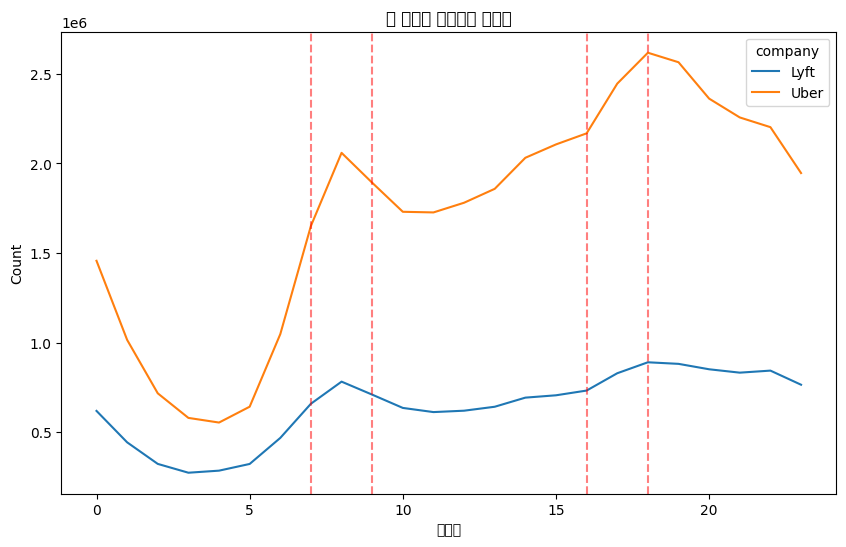

In [ ]:
# 시간대별 count(운행량) 계산
df_count = df_hour_ana.groupby(['hour', 'company']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', hue='company', data=df_count)
plt.xlabel('시간대')
plt.ylabel('Count')
plt.title('두 회사의 시간대별 운행량')

#출근시간대, 퇴근시간대 강조
highlight_hours = [7, 9, 16, 18]
for hour in highlight_hours:
    plt.axvline(x=hour, color='red', linestyle='--', alpha=0.5)

plt.show()


- 분석 과제 설정에서 출근시간을 6 ~ 8시, 퇴근시간을 16 ~ 18시로 설정했으나 그래프상 출근시간은 적절히 정의되었으나 퇴근시간을 16시~19시로 조정을 고려해봐도 좋을듯 함

- Uber와 Lyft는 굳이 검정할 필요없이 유의미한 차이를 보임

- 분명 한글이 잘 나왔는데 또 안나오네?

# 3. 가설 설정 및 분석


## 3-1 동네 별로 팁 금액의 유의미한 차이가 있을 것이다


동네 별로 팀 금액에 유의미한 차이가 있는지 분석한다. 데이터의 장소 관련 피처엔 'PULocationID'과 'DOLocationID' 두 피처가 존재한다. PULocationID은 출발 위치이고 DOLocationID은 도착위치이다. 본 가설은 거주지역과 관련한 분석이므로 출근시간과 퇴근시간을 고려하여 분석을 진행한다.

In [ ]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'company'],
      dtype='object')

In [ ]:
#필요 피처 정의
df_hy1 = df[['company','PULocationID', 'DOLocationID','pickup_datetime','dropoff_datetime','tips']]

거주지역을 고려하는 분석이므로 출근 시간대는 PULocationID 와 연결짓고 퇴근 시간대는 DOLocationID와 연결짓는다.

### 3-1-1 EDA

In [ ]:
df_hy1['tips'].value_counts()

0.00     46148890
3.00      1789611
1.00      1121508
5.00       889180
2.00       720483
           ...   
48.64           1
73.55           1
67.60           1
87.92           1
49.21           1
Name: tips, Length: 6493, dtype: int64

56853541번의 운행에서 81%에 해당하는 46148890번 팁이 0으로 기록됐다. 팁을 주지 않은 것일까? 팁을 기록하지 않은 것일까?

우선 19%에 해당하는 운행에서 팁이 기록되었으므로 이 데이터를 통해 분석한다. 0원을 제외하고 팁의 분포를 시각화해보면 다음과 같다.


#### 3-1-1-1 Boxplot & histogram

Text(0.5, 1.0, 'Box Plot of Non-Zero Tips')

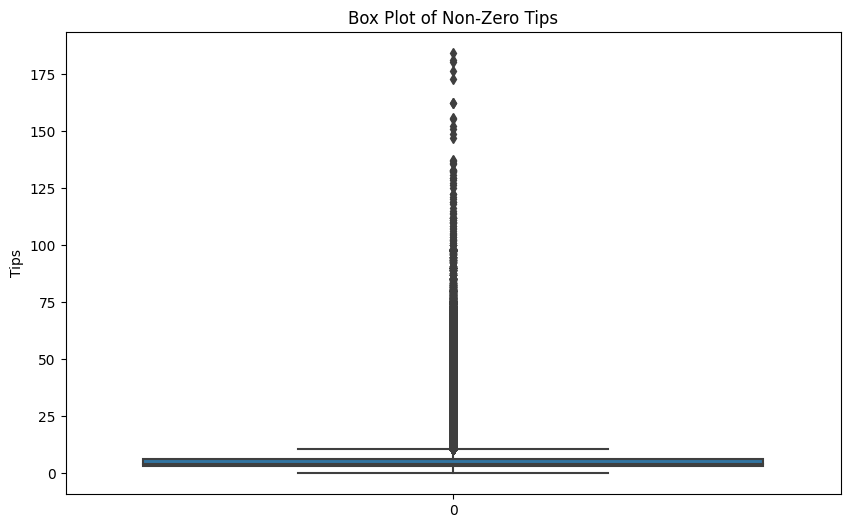

In [ ]:
# 0.00 값을 제외한 데이터 필터링
filtered_tips = df_hy1[df_hy1['tips'] != 0]['tips']

#Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_tips)
plt.ylabel('Tips')
plt.title('Box Plot of Non-Zero Tips')



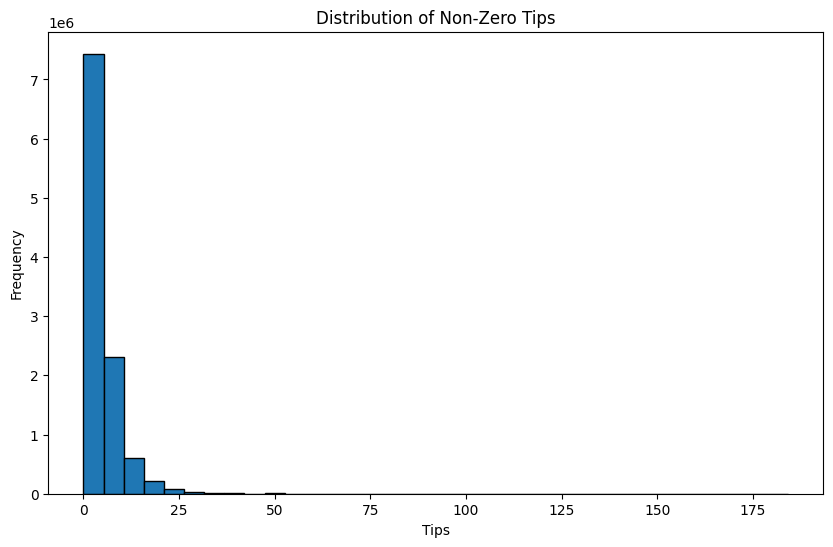

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(filtered_tips, bins=35, edgecolor='black')
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Distribution of Non-Zero Tips')
plt.show()

In [ ]:
import numpy as np

# IQR 계산
Q1 = np.percentile(filtered_tips, 25)
Q3 = np.percentile(filtered_tips, 75)
IQR = Q3 - Q1

# 이상치의 상한/하한 값 계산
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 이상치 비율 계산
outliers = filtered_tips[(filtered_tips > upper_bound) | (filtered_tips < lower_bound)]
outlier_ratio = len(outliers) / len(filtered_tips) * 100

print("이상치 비율:", outlier_ratio,"%")


이상치 비율: 8.62709115878696 %


In [ ]:
from scipy.stats import shapiro
# shapiro-wilk test
statistic, p_value = shapiro(filtered_tips)

print("검정 통계량:", statistic)
print("p-value:", p_value)

검정 통계량: 0.7346251010894775
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#가장 많이 낸 금액은?
max(filtered_tips)

184.17

- 이상치로 인해 데이터 분포가 왜곡되고 중심 경향성과 분산에 영향을 미칠 수 있기 때문에 정규분포를 따른다고 보기 힘들어 보인다. 또한 히스토그램을 봐도 육안상으로 정규분포를 따른다고 보기 힘들다. shapiro-wilk test도 통과하지 못했다.

- 팁으로 184달러를 왜 냈을까?

#### 3-1-1-2 Log transformation & Boxplot

0원을 제외했는데도 불구하고 전혀 정규분포를 따른다고 보기 어려워 보인다. 로그 변환을 적용해 본다.

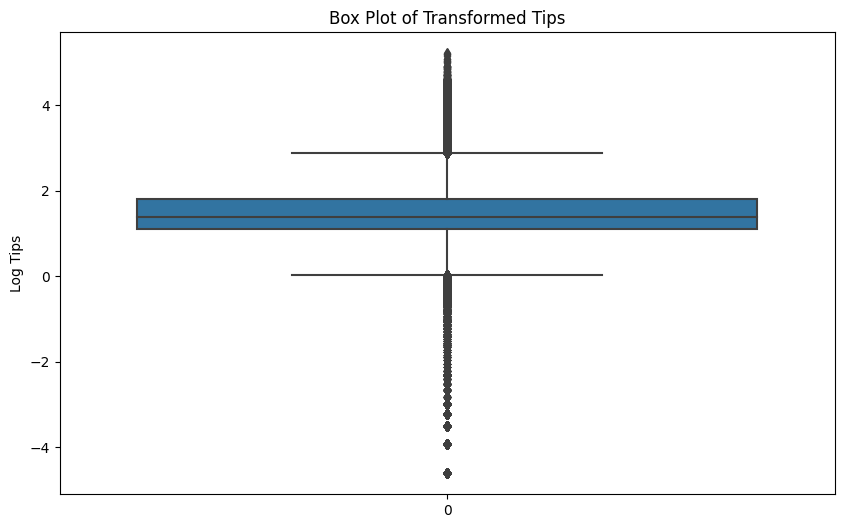

In [ ]:
# 로그 변환 적용
transformed_tips = np.log(filtered_tips)

# 이상치 확인을 위한 상자 그림(Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=transformed_tips)
plt.ylabel('Log Tips')
plt.title('Box Plot of Transformed Tips')

plt.show()

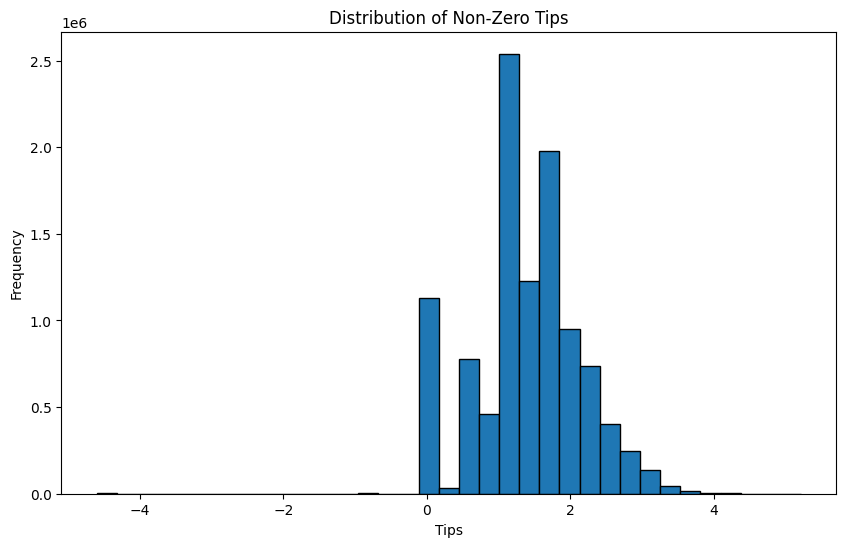

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(transformed_tips, bins=35, edgecolor='black')
plt.xlabel('Tips')
plt.ylabel('Frequency')
plt.title('Distribution of Non-Zero Tips')
plt.show()

로그변환을 했을때 어느정도 정규분포를 따를 수도 있는 것처럼 보인다. 그러면 정규성 검정도 통과할까?

#### 3-1-1-3 Log transformation & Shapiro-wilk test

In [ ]:
len(filtered_tips)

10704651

In [ ]:
from scipy.stats import shapiro

statistic, p_value = shapiro(transformed_tips)

print("검정 통계량:", statistic)
print("p-value:", p_value)

검정 통계량: 1.010895013809204
p-value: 1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value가 0.1이다. p-value가 0.05보다 작을때 '데이터가 정규분포를 따른다'라는 귀무가설을 기각하므로  로그변환했을때 해당 데이터의 분포는 정규분포를 따른다고 가정할 수 있다.

### 3-1-2 분석 전 데이터 분류
위에서 언급했다시피 지역을 고려하는 분석이므로 출근 시간대는 PULocationID 와 연결짓고 퇴근 시간대는 DOLocationID와 연결짓는다. 관련 시간대에 따라 분류후 장소값은 LocationID로 통일한다.

In [ ]:
df_hy1['PULocationID'].isnull().sum()

0

In [ ]:
# 출근 시간대(06시부터 08시)에 해당하는 데이터 추출 및 LocationID로 변경
pickup_data = df_hy1.loc[(df_hy1['hour_pickup'] >= 6) & (df_hy1['hour_pickup'] <= 8), ['company', 'PULocationID', 'hour_pickup', 'hour_dropoff', 'tips']]
pickup_data = pickup_data.rename(columns={'PULocationID': 'LocationID'})

# 퇴근 시간대(16시부터 19시)에 해당하는 데이터 추출 및 LocationID로 변경
dropoff_data = df_hy1.loc[(df_hy1['hour_dropoff'] >= 16) & (df_hy1['hour_dropoff'] <= 19), ['company', 'DOLocationID', 'hour_pickup', 'hour_dropoff', 'tips']]
dropoff_data = dropoff_data.rename(columns={'DOLocationID': 'LocationID'})

# 병합하여 분석에 활용할 데이터프레임 생성
df_hy1_ana = pd.concat([pickup_data, dropoff_data], ignore_index=True)


In [ ]:
df_hy1_ana.head()

,company,LocationID,hour_pickup,hour_dropoff,tips
0,Uber,39,6,6,0.00
1,Uber,39,6,6,0.00
2,Uber,39,6,7,0.00
3,Uber,25,6,6,1.00
4,Uber,49,6,6,2.59


In [47]:
import scipy.stats as stats

# LocationID에 따른 tips 데이터 추출
location_groups = [group[1] for group in df_hy1_ana.groupby('LocationID')['tips']] #[group[1]은 tips

# ANOVA
f_statistic, p_value = stats.f_oneway(*location_groups)

# 결과
print("ANOVA 결과:")
print("F-통계량:", f_statistic)
print("p-value:", p_value)


ANOVA 결과:
F-통계량: 5019.980399763071
p-value: 0.0


p-value가  0.05이하이므로 지역간의 tip이 유의미한 차이가 없다는 귀무가설을 기각하고 대립가설을 채택한다. 따라서 지역에 따른 tips의 평균에는 유의미한 차이가 있다고 결론을 내릴 수 있다.